<a href="https://colab.research.google.com/github/NoshinTarannum/Custom-CNN-MNIST-Dataset/blob/main/19221014_Noshin_Tarannum_Rahman_01_Custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Dimensions
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


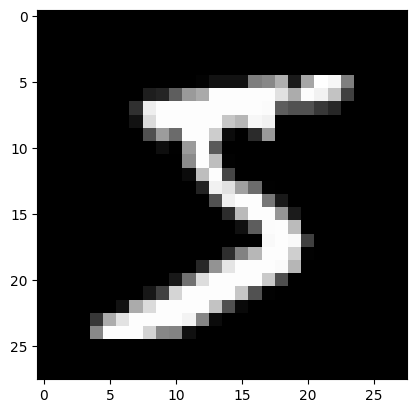

In [ ]:
# To complete
import matplotlib.pyplot as plt
%matplotlib inline
image = X_train[0]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# Normalize
X_train = X_train / 255.0
X_test =  X_test / 255.0

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# To complete
num_classes = 10 # number of classes

In [ ]:
# Performance Evaluation

activation_results = {}
configuration_results = {}

import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Function to evaluate and print classification metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    print("Classification Report:")
    print(classification_report(y_true_labels, y_pred_labels))

    return y_pred_labels

In [ ]:
# CNN network - baseline model
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dense

def small_convnet():

    # create base CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# To complete
model = small_convnet()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

print("Performance Metrics:")
y_pred_labels = evaluate_model(model, X_test, y_test)
print("----------")

Epoch 1/10
300/300 - 75s - loss: 0.2930 - accuracy: 0.9150 - val_loss: 0.0654 - val_accuracy: 0.9799 - 75s/epoch - 250ms/step
Epoch 2/10
300/300 - 52s - loss: 0.0649 - accuracy: 0.9801 - val_loss: 0.0455 - val_accuracy: 0.9855 - 52s/epoch - 175ms/step
Epoch 3/10
300/300 - 52s - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0397 - val_accuracy: 0.9878 - 52s/epoch - 172ms/step
Epoch 4/10
300/300 - 51s - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0326 - val_accuracy: 0.9901 - 51s/epoch - 172ms/step
Epoch 5/10
300/300 - 52s - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0264 - val_accuracy: 0.9912 - 52s/epoch - 174ms/step
Epoch 6/10
300/300 - 51s - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0301 - val_accuracy: 0.9902 - 51s/epoch - 171ms/step
Epoch 7/10
300/300 - 51s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0272 - val_accuracy: 0.9922 - 51s/epoch - 171ms/step
Epoch 8/10
300/300 - 51s - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0268 - val_accuracy: 0.9911 - 51s/epoch - 169

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \nError: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9916999936103821 
Error: 0.830000638961792


In [ ]:
y_true_labels = np.argmax(y_test, axis=1)

In [ ]:
# Experimenting with different activation functions

# Function to build the CNN architecture
def build_cnn_actv(activation_func):
    model = Sequential()

    # Add Convolutional and Pooling layers with the specified activation function
    model.add(Conv2D(32, (3, 3), activation=activation_func, input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation_func))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation_func))

    # Flatten the output for the fully connected layers
    model.add(Flatten())

    # Add Fully Connected layers
    model.add(Dense(64, activation=activation_func))
    model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

    return model

# List of activation functions to experiment with
activation_functions = ['LeakyReLU', 'sigmoid', 'tanh']

# Train and evaluate models with different activation functions
for activation_func in activation_functions:
    print(f"Training model with {activation_func} activation function")
    model = build_cnn_actv(activation_func)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy with {activation_func} activation function:", test_acc)
    print("----------")

    print("Performance Metrics:")
    y_pred_labels = evaluate_model(model, X_test, y_test)
    print("----------")

    activation_results[activation_func] = classification_report(y_true_labels, y_pred_labels, output_dict=True)

Training model with LeakyReLU activation function
Epoch 1/10
300/300 - 55s - loss: 0.2583 - accuracy: 0.9221 - val_loss: 0.0661 - val_accuracy: 0.9796 - 55s/epoch - 185ms/step
Epoch 2/10
300/300 - 55s - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.0429 - val_accuracy: 0.9860 - 55s/epoch - 183ms/step
Epoch 3/10
300/300 - 55s - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0339 - val_accuracy: 0.9893 - 55s/epoch - 182ms/step
Epoch 4/10
300/300 - 54s - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0345 - val_accuracy: 0.9888 - 54s/epoch - 179ms/step
Epoch 5/10
300/300 - 54s - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.0306 - val_accuracy: 0.9903 - 54s/epoch - 179ms/step
Epoch 6/10
300/300 - 53s - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0326 - val_accuracy: 0.9904 - 53s/epoch - 177ms/step
Epoch 7/10
300/300 - 53s - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0303 - val_accuracy: 0.9896 - 53s/epoch - 177ms/step
Epoch 8/10
300/300 - 54s - loss: 0.0187 - accuracy: 0.9941 - val_los

In [ ]:
# Experimenting with different convolutional layers

# Function to build the CNN architecture with varying convolutional layer configurations
def build_cnn_conv(filters, kernel_size, strides):
    model = Sequential()

    # Add Convolutional and Pooling layers with varying configurations
    model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=(28, 28, 1), strides=strides))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters * 2, kernel_size, activation='relu', strides=strides))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters * 2, kernel_size, activation='relu', strides=strides))

    # Flatten the output for the fully connected layers
    model.add(Flatten())

    # Add Fully Connected layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

    return model

# List of convolutional layer configurations to experiment with
configurations = [(32, (1, 1), (1, 1)),  # Filters, Kernel Size, Strides
                  (64, (1, 1), (1, 1)),
                  (32, (3, 3), (1, 1)),
                  (64, (3, 3), (1, 1))]

# Train and evaluate models with different convolutional layer configurations
for config in configurations:
    filters, kernel_size, strides = config
    print(f"Training model with {filters} filters, {kernel_size} kernel size, and {strides} strides")

    model = build_cnn_conv(filters, kernel_size, strides)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy with configuration {config}:", test_acc)
    print("----------")

    print("Performance Metrics:")
    y_pred_labels = evaluate_model(model, X_test, y_test)
    print("----------")

    configuration_results[config] = classification_report(y_true_labels, y_pred_labels, output_dict=True)

Training model with 32 filters, (1, 1) kernel size, and (1, 1) strides
Epoch 1/10
300/300 - 32s - loss: 0.6509 - accuracy: 0.7914 - val_loss: 0.4019 - val_accuracy: 0.8704 - 32s/epoch - 107ms/step
Epoch 2/10
300/300 - 29s - loss: 0.3675 - accuracy: 0.8813 - val_loss: 0.3307 - val_accuracy: 0.8920 - 29s/epoch - 97ms/step
Epoch 3/10
300/300 - 30s - loss: 0.3065 - accuracy: 0.9011 - val_loss: 0.2883 - val_accuracy: 0.9079 - 30s/epoch - 99ms/step
Epoch 4/10
300/300 - 32s - loss: 0.2719 - accuracy: 0.9121 - val_loss: 0.2703 - val_accuracy: 0.9142 - 32s/epoch - 107ms/step
Epoch 5/10
300/300 - 29s - loss: 0.2478 - accuracy: 0.9215 - val_loss: 0.2421 - val_accuracy: 0.9258 - 29s/epoch - 98ms/step
Epoch 6/10
300/300 - 31s - loss: 0.2327 - accuracy: 0.9252 - val_loss: 0.2412 - val_accuracy: 0.9243 - 31s/epoch - 104ms/step
Epoch 7/10
300/300 - 29s - loss: 0.2171 - accuracy: 0.9296 - val_loss: 0.2189 - val_accuracy: 0.9305 - 29s/epoch - 97ms/step
Epoch 8/10
300/300 - 30s - loss: 0.2089 - accuracy:

Evaluating model with relu activation function
313/313 [==============================] - 5s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.06      0.16      0.09      1135
           2       0.00      0.00      0.00      1032
           3       0.05      0.01      0.02      1010
           4       0.21      0.91      0.34       982
           5       0.08      0.22      0.11       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.13     10000
   macro avg       0.04      0.13      0.06     10000
weighted avg       0.04      0.13      0.06     10000

----------
Evaluating model with LeakyReLU activation function


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

313/313 [==============================] - 3s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.12      0.97      0.21       982
           5       0.12      0.04      0.06       892
           6       0.00      0.00      0.00       958
           7       0.07      0.00      0.01      1028
           8       0.01      0.01      0.01       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.03      0.10      0.03     10000
weighted avg       0.03      0.10      0.03     10000

----------
Evaluating model with sigmoid activation function


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

313/313 [==============================] - 4s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.10      1.00      0.18       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

----------
Evaluating model with tanh activation function


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

313/313 [==============================] - 3s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.04      0.00      0.00      1010
           4       0.08      0.06      0.07       982
           5       0.19      0.58      0.28       892
           6       0.50      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.05      0.04      0.05       974
           9       0.10      0.55      0.17      1009

    accuracy                           0.12     10000
   macro avg       0.10      0.12      0.06     10000
weighted avg       0.09      0.12      0.05     10000

----------
Evaluating model with 32 filters, (1, 1) kernel size, and (1, 1) strides


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

313/313 [==============================] - 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.00      0.00       980
           1       0.20      0.53      0.29      1135
           2       0.04      0.01      0.01      1032
           3       0.12      0.56      0.20      1010
           4       0.79      0.06      0.11       982
           5       0.10      0.06      0.08       892
           6       0.01      0.01      0.01       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.13     10000
   macro avg       0.13      0.12      0.07     10000
weighted avg       0.13      0.13      0.07     10000

----------
Evaluating model with 64 filters, (1, 1) kernel size, and (1, 1) strides


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

313/313 [==============================] - 3s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.23      0.07      0.10      1032
           3       0.00      0.00      0.00      1010
           4       0.21      0.02      0.03       982
           5       0.11      0.78      0.20       892
           6       0.00      0.01      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.16      0.16      0.16      1009

    accuracy                           0.09     10000
   macro avg       0.07      0.10      0.05     10000
weighted avg       0.07      0.09      0.05     10000

----------
Evaluating model with 32 filters, (3, 3) kernel size, and (1, 1) strides


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

313/313 [==============================] - 3s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.02      0.02       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.09      0.69      0.16      1010
           4       0.00      0.00      0.00       982
           5       0.24      0.02      0.04       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.03      0.00      0.00       974
           9       0.07      0.00      0.01      1009

    accuracy                           0.07     10000
   macro avg       0.05      0.07      0.02     10000
weighted avg       0.04      0.07      0.02     10000

----------
Evaluating model with 64 filters, (3, 3) kernel size, and (1, 1) strides


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

313/313 [==============================] - 6s 19ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.21      0.06      0.09      1032
           3       0.09      0.02      0.03      1010
           4       0.14      0.01      0.01       982
           5       0.00      0.00      0.00       892
           6       0.10      0.97      0.19       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.03      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.06      0.11      0.03     10000
weighted avg       0.06      0.10      0.03     10000

----------
Activation Function Results:
          accuracy precision    recall  f1-score
relu         0.128  0.040421  0.129889  0.056482
LeakyReLU   0.1008  0.03

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

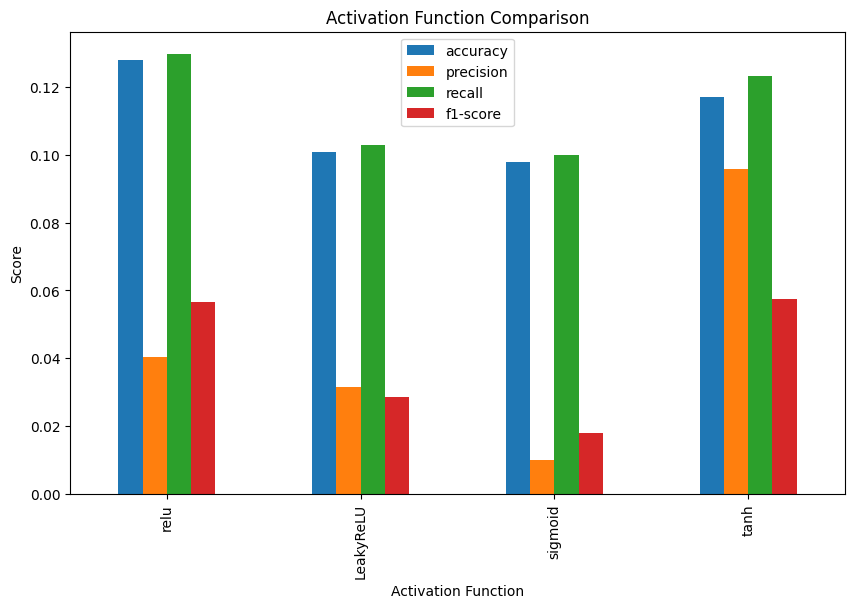

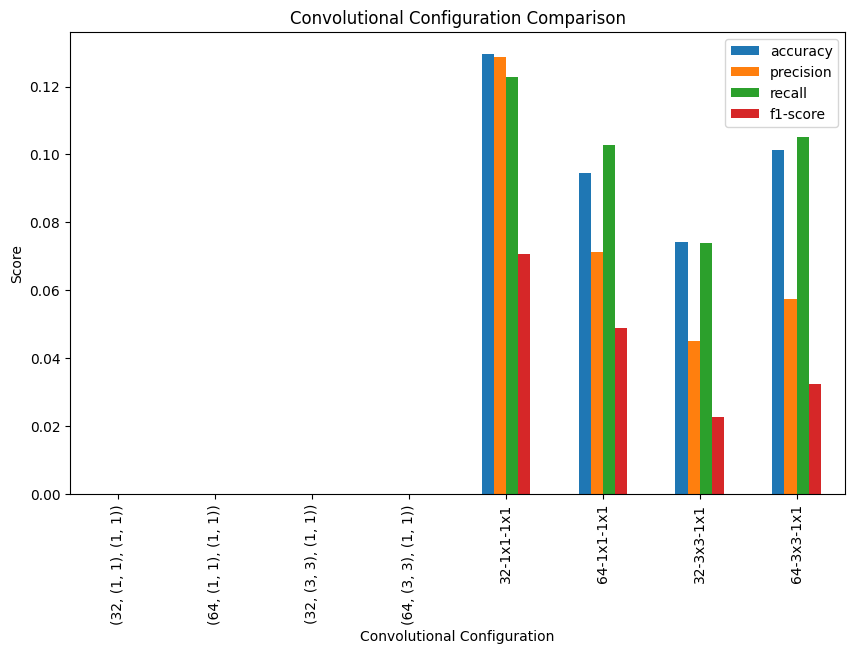

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the activation functions and configurations
activation_functions = ['relu', 'LeakyReLU', 'sigmoid', 'tanh']
configurations = [(32, (1, 1), (1, 1)),
                  (64, (1, 1), (1, 1)),
                  (32, (3, 3), (1, 1)),
                  (64, (3, 3), (1, 1))]

# Create DataFrames to store results
activation_results_df = pd.DataFrame(index=activation_functions, columns=['accuracy', 'precision', 'recall', 'f1-score'])
configuration_results_df = pd.DataFrame(index=configurations, columns=['accuracy', 'precision', 'recall', 'f1-score'])

# Evaluate models with different activation functions
for activation_func in activation_functions:
    print(f"Evaluating model with {activation_func} activation function")
    model = build_cnn_actv(activation_func)

    y_pred_labels = evaluate_model(model, X_test, y_test)

    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='macro')
    recall = recall_score(y_true_labels, y_pred_labels, average='macro')
    f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

    activation_results_df.loc[activation_func] = [accuracy, precision, recall, f1]
    print("----------")

# Evaluate models with different convolutional layer configurations
for config in configurations:
    filters, kernel_size, strides = config
    config_str = f"{filters}-{kernel_size[0]}x{kernel_size[1]}-{strides[0]}x{strides[1]}"
    print(f"Evaluating model with {filters} filters, {kernel_size} kernel size, and {strides} strides")

    model = build_cnn_conv(filters, kernel_size, strides)

    y_pred_labels = evaluate_model(model, X_test, y_test)

    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='macro')
    recall = recall_score(y_true_labels, y_pred_labels, average='macro')
    f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

    configuration_results_df.loc[config_str] = [accuracy, precision, recall, f1]
    print("----------")

# Print and visualize the results
print("Activation Function Results:")
print(activation_results_df)

print("\nConvolutional Configuration Results:")
print(configuration_results_df)

# Create bar plots to compare metrics for activation functions
activation_results_df.plot(kind='bar', title='Activation Function Comparison', figsize=(10, 6))
plt.ylabel('Score')
plt.xlabel('Activation Function')
plt.show()

# Create bar plots to compare metrics for convolutional configurations
configuration_results_df.plot(kind='bar', title='Convolutional Configuration Comparison', figsize=(10, 6))
plt.ylabel('Score')
plt.xlabel('Convolutional Configuration')
plt.show()

`~~~`